# Task-6

### (A)Compare multiple machine learning models on a dataset.

In [ ]:
#Step-1-> Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


In [ ]:
#Step-2-> Load and Explore the Dataset
df = pd.read_csv("/content/StudentsPerformance.csv")
df.head()
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [ ]:
#Step-3-> Data Preprocessing:-
   #(a) Encode categorical variables
   #(b) Normalize/scale numerical features
   #(c) Convert target variable to binary

# Example: Binary target
df['target'] = (df['math score'] >= 50).astype(int)

# Encode categorical columns
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].apply(LabelEncoder().fit_transform)

# Feature-target split
X = df.drop('target', axis=1)
y = df['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
#Step-4-> Train Multiple Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss')

}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob)

    results.append({
        'Model': name,
        'Accuracy': acc,
        'F1-Score': f1,
        'ROC-AUC': roc
    })


In [ ]:
#Step-5-> Model Comparison Table
results_df = pd.DataFrame(results).sort_values(by='ROC-AUC', ascending=False)
print(results_df)


                 Model  Accuracy  F1-Score   ROC-AUC
1        Random Forest     1.000  1.000000  1.000000
4              XGBoost     1.000  1.000000  1.000000
0  Logistic Regression     0.960  0.976190  0.996279
2                  SVM     0.940  0.964912  0.989901
3                  KNN     0.905  0.944928  0.941265


In [ ]:
#Step-6-> Hyperparameter Tuning
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20]
}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='f1')
grid_rf.fit(X_train, y_train)

print("Best RF Parameters:", grid_rf.best_params_)
print("Best RF Score:", grid_rf.best_score_)


Best RF Parameters: {'max_depth': None, 'n_estimators': 50}
Best RF Score: 1.0


In [ ]:
#Step-7-> Final Model Evaluation
best_model = grid_rf.best_estimator_
y_final_pred = best_model.predict(X_test)
print(classification_report(y_test, y_final_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00       166

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



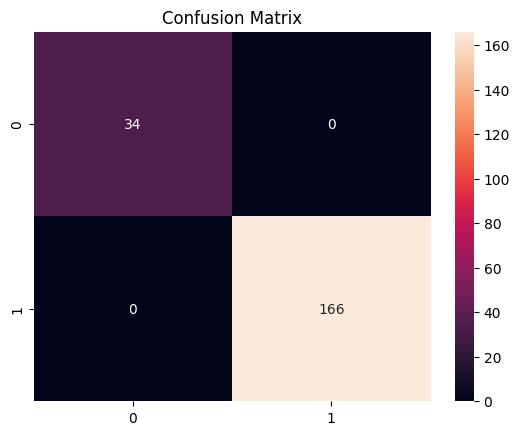

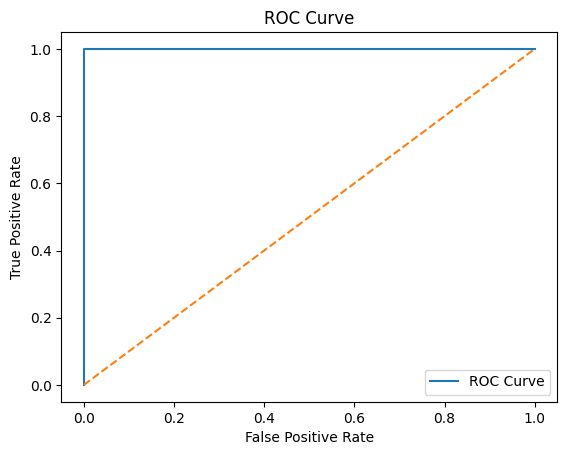

In [ ]:
#Step-8-> Visualization
   #(a)Confusion Matrix
   #(b)ROC Curves
sns.heatmap(confusion_matrix(y_test, y_final_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


### (B) Evaluate Using Metrics Like Accuracy, F1-Score, Roc-Auc

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

# Dictionary to store results
results = []

# Models to evaluate
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss')
}

# Loop through models
for name, model in models.items():
    model.fit(X_train, y_train)  # Train
    y_pred = model.predict(X_test)  # Predict class
    y_proba = model.predict_proba(X_test)[:, 1]  # Predict probabilities

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba)

    # Store results
    results.append({
        'Model': name,
        'Accuracy': acc,
        'F1-Score': f1,
        'ROC-AUC': roc
    })

    print(f"----- {name} -----")
    print("Accuracy:", acc)
    print("F1 Score:", f1)
    print("ROC-AUC:", roc)
    print(classification_report(y_test, y_pred))
    print("\n")

# Convert to DataFrame for comparison
import pandas as pd

results_df = pd.DataFrame(results).sort_values(by='ROC-AUC', ascending=False)
print("Model Comparison:\n", results_df)


----- Logistic Regression -----
Accuracy: 0.96
F1 Score: 0.9761904761904762
ROC-AUC: 0.9962792345854004
              precision    recall  f1-score   support

           0       0.93      0.82      0.88        34
           1       0.96      0.99      0.98       166

    accuracy                           0.96       200
   macro avg       0.95      0.91      0.93       200
weighted avg       0.96      0.96      0.96       200



----- Random Forest -----
Accuracy: 1.0
F1 Score: 1.0
ROC-AUC: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00       166

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



----- SVM -----
Accuracy: 0.94
F1 Score: 0.9649122807017544
ROC-AUC: 0.989900779588944
              precision    recall  f1-score   support

           0       0.96      

### (C) Perform Hyperparameter Tuning Using Gridsearchcv.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters (GridSearchCV):", grid_search.best_params_)
print("Best F1 Score (GridSearchCV):", grid_search.best_score_)


Best Parameters (GridSearchCV): {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best F1 Score (GridSearchCV): 1.0


### (D) Perform Hyperparameter Tuning Using Randomizedsearchcv.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Random parameter distribution
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None] + list(range(5, 30, 5)),
    'min_samples_split': randint(2, 11)
}

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=10,  # Number of random combinations to try
    cv=5,
    scoring='f1',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters (RandomizedSearchCV):", random_search.best_params_)
print("Best F1 Score (RandomizedSearchCV):", random_search.best_score_)


Best Parameters (RandomizedSearchCV): {'max_depth': 15, 'min_samples_split': 9, 'n_estimators': 70}
Best F1 Score (RandomizedSearchCV): 1.0
